# 2. Exploratory Data Analysis (EDA)

In [1]:
# format code
# pip install nb_black
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

<IPython.core.display.Javascript object>

In [3]:
data = pd.read_pickle("data/pickle/split_dtm.pkl")
data = data.transpose()  # DTM -> TDM
data.head

<bound method NDFrame.head of            2019-05  2019-06  2019-07  2019-08  2019-09  2019-10  2019-11  \
aa              15        8        1        1        0        0        0   
aachen          18       12        3        3        0        1        0   
aaliyah          0        0        0        0        0        0        0   
ab            3429      365       79       65       46       16       42   
aba             11        1        0        1        0        1        0   
...            ...      ...      ...      ...      ...      ...      ...   
übrigends       15        1        0        0        0        0        0   
übrigens      1338      221       37       30       16        9       14   
übriges         11        1        0        0        1        0        0   
übt              9        4        0        0        0        0        0   
übung            5        1        2        1        0        0        0   

           2019-12  2020-01  2020-02  ...  2020-11  2020-

<IPython.core.display.Javascript object>

In [4]:
# top20
top_dict = {}

for c in data.columns:
    top = data[c].sort_values(ascending=False).head(20)
    top_dict[c] = list(zip(top.index, top.values))

top_dict

{'2019-05': [('mal', 23373),
  ('cdu', 21575),
  ('mehr', 20441),
  ('ja', 17153),
  ('schon', 15644),
  ('einfach', 14889),
  ('rezo', 14539),
  ('wählen', 14474),
  ('menschen', 12026),
  ('gut', 11751),
  ('hast', 11587),
  ('partei', 10776),
  ('deutschland', 10685),
  ('danke', 10557),
  ('politik', 10388),
  ('immer', 10385),
  ('gibt', 10056),
  ('grünen', 9322),
  ('geht', 8907),
  ('afd', 8681)],
 '2019-06': [('mal', 2975),
  ('video', 2858),
  ('rezo', 2378),
  ('ja', 2371),
  ('schon', 2222),
  ('mehr', 2212),
  ('gibt', 1595),
  ('grünen', 1480),
  ('einfach', 1467),
  ('cdu', 1451),
  ('menschen', 1359),
  ('immer', 1336),
  ('hast', 1283),
  ('deutschland', 1154),
  ('gut', 1129),
  ('geht', 938),
  ('meinung', 919),
  ('macht', 863),
  ('leute', 861),
  ('viele', 852)],
 '2019-07': [('mal', 546),
  ('ja', 420),
  ('schon', 392),
  ('mehr', 383),
  ('rezo', 352),
  ('video', 331),
  ('einfach', 296),
  ('menschen', 254),
  ('cdu', 245),
  ('hast', 241),
  ('gibt', 227),
 

<IPython.core.display.Javascript object>

In [5]:
for month, top_words in top_dict.items():
    print(month)
    print(", ".join([word for word, count in top_words[:20]]))
    print("---")

2019-05
mal, cdu, mehr, ja, schon, einfach, rezo, wählen, menschen, gut, hast, partei, deutschland, danke, politik, immer, gibt, grünen, geht, afd
---
2019-06
mal, video, rezo, ja, schon, mehr, gibt, grünen, einfach, cdu, menschen, immer, hast, deutschland, gut, geht, meinung, macht, leute, viele
---
2019-07
mal, ja, schon, mehr, rezo, video, einfach, menschen, cdu, hast, gibt, gut, immer, deutschland, geht, grünen, schmidt, ganz, macht, wäre
---
2019-08
mal, ja, video, schon, rezo, mehr, einfach, hast, immer, gibt, menschen, schmidt, cdu, deutschland, gut, afd, grünen, ganz, geht, gar
---
2019-09
mal, ja, video, mehr, schon, einfach, immer, menschen, rezo, gibt, grünen, hast, ganz, afd, geht, cdu, wirklich, bitte, leute, klimawandel
---
2019-10
mal, ja, mehr, video, schon, rezo, immer, menschen, cdu, meinung, afd, hast, einfach, gibt, deutschland, gut, bernd, geht, ganz, leute
---
2019-11
mal, ja, mehr, schon, afd, menschen, video, immer, einfach, hast, gibt, partei, deutschland, bern

<IPython.core.display.Javascript object>

In [4]:
# additional stop words
stop_words_add = [
    "mal",
    "mehr",
    "ja",
    "schon",
    "gibt",
    "geht",
    "hast",
    "einfach",
    "ganz",
    "macht",
    "immer",
    "tun",
    "viele",
    "wer",
    "sagen",
    "wäre",
    "genau",
    "dafür",
    "natürlich",
    "seit",
    "wurde",
    "eigentlich",
    "kommt",
    "gesagt",
    "sagt",
    "nie",
    "sehen",
    "deren",
    "versuchen",
    "empfehlen",
    "müssen",
    "kurz",
    "wenig",
    "erste",
    "klare",
    "gar",
    "grad",
    "wohl",
    "oft",
    "ha",
    "schaffen",
    "daher",
    "schreibt",
    "ständig",
    "völlig",
    "verdient",
    "worden",
    "solange",
    "könnt",
    "mann",
    "zeigt",
    "später",
    "erste",
    "iwelche",
    "wen",
    "eigenem",
]
data.drop(index=stop_words_add, inplace=True)

<IPython.core.display.Javascript object>

In [5]:
# top20 after additional stopwords
top_dict = {}

for c in data.columns:
    top = data[c].sort_values(ascending=False).head(20)
    top_dict[c] = list(zip(top.index, top.values))

top_dict

{'2019-05': [('cdu', 21575),
  ('rezo', 14539),
  ('wählen', 14474),
  ('menschen', 12026),
  ('gut', 11751),
  ('partei', 10776),
  ('deutschland', 10685),
  ('danke', 10557),
  ('politik', 10388),
  ('grünen', 9322),
  ('afd', 8681),
  ('leute', 8303),
  ('parteien', 7703),
  ('bitte', 7254),
  ('meinung', 6866),
  ('wirklich', 6843),
  ('welt', 6362),
  ('politiker', 6125),
  ('spd', 5987),
  ('leider', 5821)],
 '2019-06': [('video', 2858),
  ('rezo', 2378),
  ('grünen', 1480),
  ('cdu', 1451),
  ('menschen', 1359),
  ('deutschland', 1154),
  ('gut', 1129),
  ('meinung', 919),
  ('leute', 861),
  ('welt', 839),
  ('klimawandel', 817),
  ('politik', 796),
  ('bitte', 774),
  ('warum', 746),
  ('schmidt', 727),
  ('wirklich', 720),
  ('afd', 696),
  ('jahren', 672),
  ('klima', 615),
  ('thema', 599)],
 '2019-07': [('rezo', 352),
  ('video', 331),
  ('menschen', 254),
  ('cdu', 245),
  ('gut', 227),
  ('deutschland', 193),
  ('grünen', 189),
  ('schmidt', 182),
  ('klimawandel', 153),

<IPython.core.display.Javascript object>

In [6]:
for month, top_words in top_dict.items():
    print(month)
    print(", ".join([word for word, count in top_words[:20]]))
    print("---")

2019-05
cdu, rezo, wählen, menschen, gut, partei, deutschland, danke, politik, grünen, afd, leute, parteien, bitte, meinung, wirklich, welt, politiker, spd, leider
---
2019-06
video, rezo, grünen, cdu, menschen, deutschland, gut, meinung, leute, welt, klimawandel, politik, bitte, warum, schmidt, wirklich, afd, jahren, klima, thema
---
2019-07
rezo, video, menschen, cdu, gut, deutschland, grünen, schmidt, klimawandel, afd, leute, bitte, meinung, welt, janich, warum, politik, klima, wirklich, jahren
---
2019-08
video, rezo, menschen, schmidt, cdu, deutschland, gut, afd, grünen, bitte, warum, leute, wirklich, erde, klimawandel, welt, richtig, politik, meinung, jahren
---
2019-09
video, menschen, rezo, grünen, afd, cdu, wirklich, bitte, leute, klimawandel, warum, gut, deutschland, leben, welt, meinung, partei, recht, echt, erst
---
2019-10
video, rezo, menschen, cdu, meinung, afd, deutschland, gut, bernd, leute, youtube, partei, grünen, wirklich, welt, klimawandel, wählen, politik, leben, 

<IPython.core.display.Javascript object>

In [7]:
stop_words = set(stopwords.words("german"))
stop_words_union = list(stop_words) + stop_words_add

data_clean = pd.read_pickle("data/pickle/df_corpus_cleaned.pkl")

cv = CountVectorizer(stop_words=stop_words_union, dtype=np.int16)
data_cv = cv.fit_transform(data_clean.comment)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

<IPython.core.display.Javascript object>

In [8]:
pickle.dump(cv, open("data/pickle/cv_stop.pkl", "wb"))
data_stop.to_pickle("data/pickle/dtm_stop.pkl")

<IPython.core.display.Javascript object>

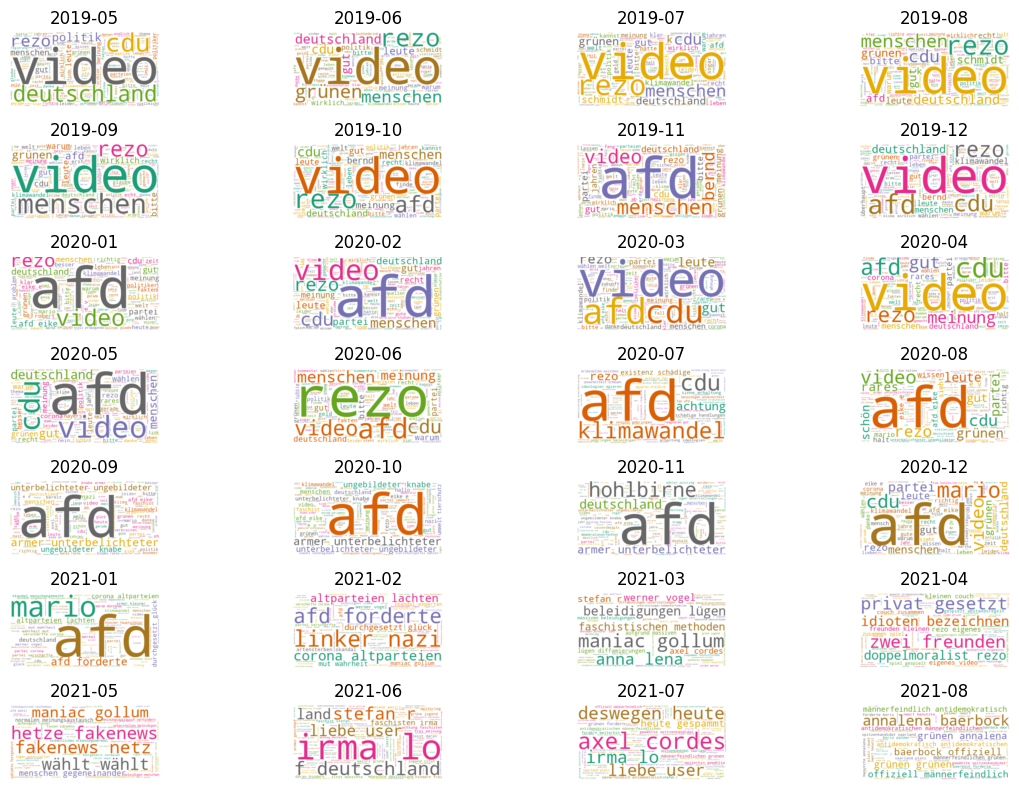

<IPython.core.display.Javascript object>

In [15]:
wc = WordCloud(
    stopwords=stop_words_union,
    background_color="white",
    colormap="Dark2",
    max_font_size=150,
    random_state=100,
)
plt.rcParams["figure.figsize"] = [12, 8]

for index, month in enumerate(data.columns):
    wc.generate(data_clean.loc[month]["comment"])

    fig = plt.subplot(7, 4, index + 1)

    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(month)
    wc.to_file("data/png/month/" + month + ".png")
plt.tight_layout()
plt.show()

In [9]:
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
plt.rcParams["figure.figsize"] = [12, 8]
plt.rcParams["figure.dpi"] = 100

<IPython.core.display.Javascript object>

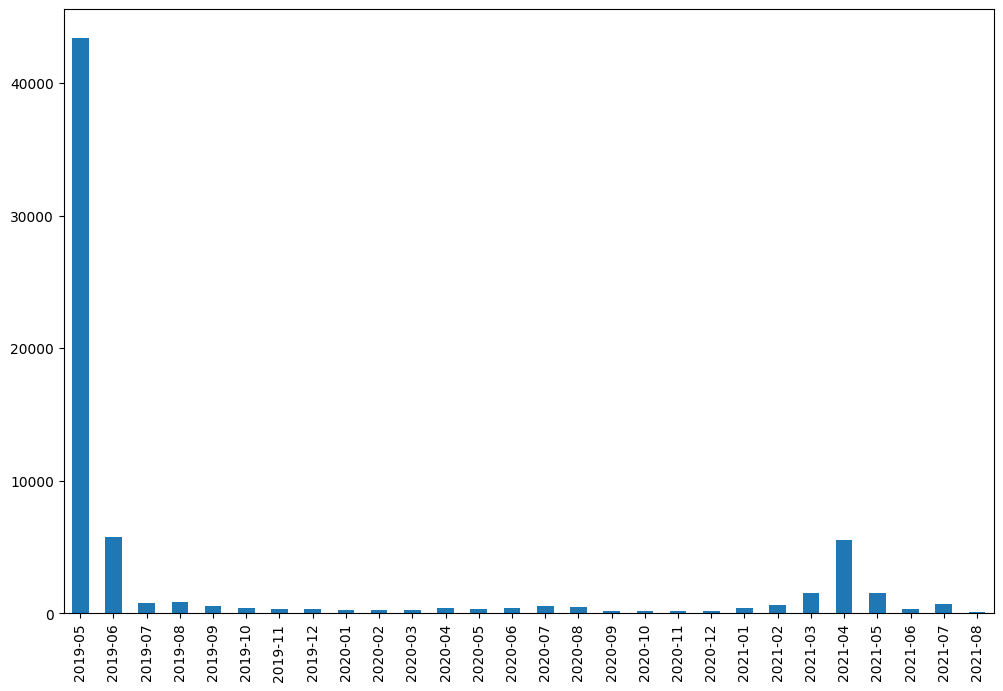

<IPython.core.display.Javascript object>

In [10]:
data_rezo = data.transpose()[["rezo", "video", "youtube", "kommentare", "kanal"]]
df_rezo = data_rezo.abs().sum(axis=1)

ax = df_rezo.plot.bar()

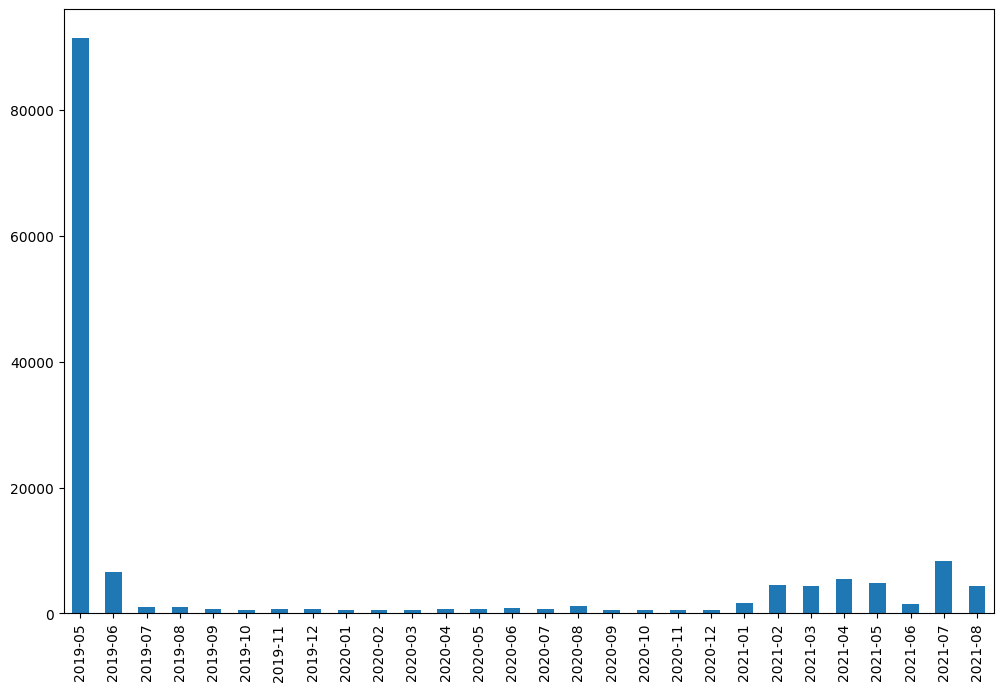

<IPython.core.display.Javascript object>

In [11]:
data_parties = data.transpose()[
    [
        "afd",
        "cdu",
        "grünen",
        "spd",
        "spitzenkandidat",
        "wählen",
        "gewählte",
        "wählt",
        "partei",
        "politik",
        "politiker",
        "altparteien",
        "wählerstimmen",
        "regierungskoalition",
        "gehtwaehlen",
        "baerbock",
        "annalena",
        "wahlmacht",
        "wahlwerbung",
    ]
]
df_parties = data_parties.abs().sum(axis=1)

ax = df_parties.plot.bar()

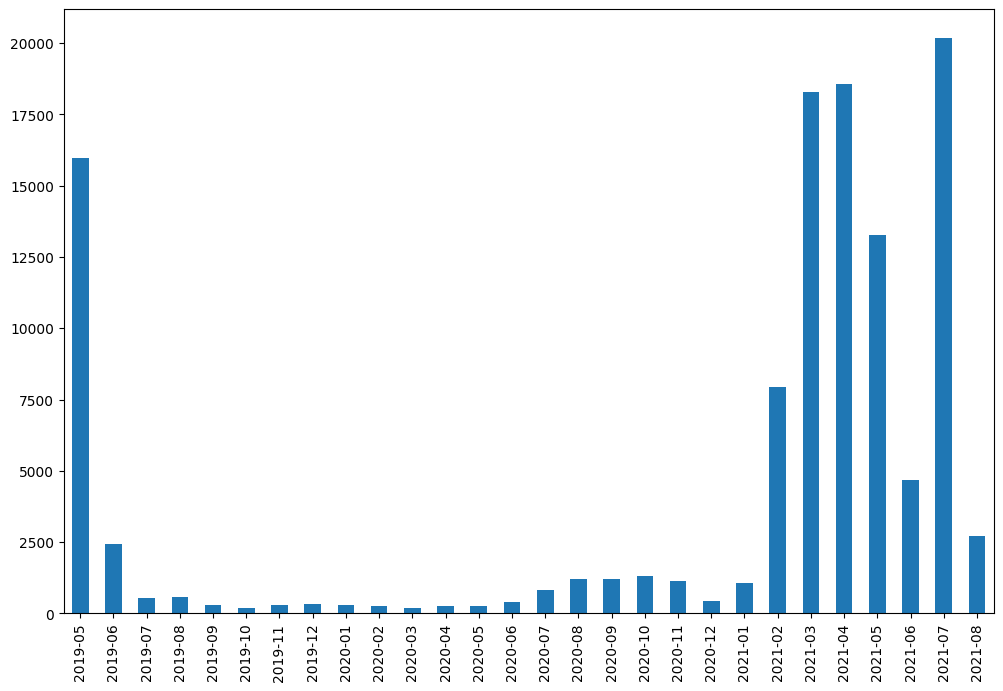

<IPython.core.display.Javascript object>

In [12]:
data_negative = data.transpose()[
    [
        "armer",
        "unterbelichteter",
        "ungebildeter",
        "nazi",
        "nationalsozialistische",
        "faschist",
        "hohlbirne",
        "linker",
        "lügen",
        "gollum",
        "beleidigen",
        "beleidigungen",
        "beleidigt",
        "unterstellungen",
        "unterstellen",
        "faschistischen",
        "knabe",
        "antifa",
        "idioten",
        "volksverpetzer",
        "propaganda",
        "troll",
        "ideologie",
        "ideologien",
        "vogel",
        "fakenews",
        "hetze",
        "maniac",
        "antidemokratischen",
        "männerfeindlich",
        "antidemokratisch",
        "männerfeindlichen",
        "subjekte",
        "marionette",
        "kleinreden",
        "quacksalber",
        "realsatire",
        "kiddy",
        "menschenverachtend",
        "dullies",
        "halbwahrheiten",
        "heuchlerischen",
        "heucheln",
        "grütze",
        "vergewaltigt",
        "lämmer",
        "löschte",
        "destruktiv",
        "spamattacke",
        "tränen",
        "grütze",
        "linksradikalen",
        "meinungsdiktatur",
        "kloppen",
        "manipulatoren",
        "widerlich",
        "verkommen",
        "hindern",
        "verhindern",
        "ekelhaften",
        "birne",
        "kleinen",
        "weltkrieg",
        "dummheit",
        "dumm",
        "schwachsinn",
        "unsinn",
        "bomben",
        "terror",
        "diffamierungen",
        "schuld",
        "angst",
        "schlimm",
    ]
]
df_negative = data_negative.abs().sum(axis=1)

ax = df_negative.plot.bar()

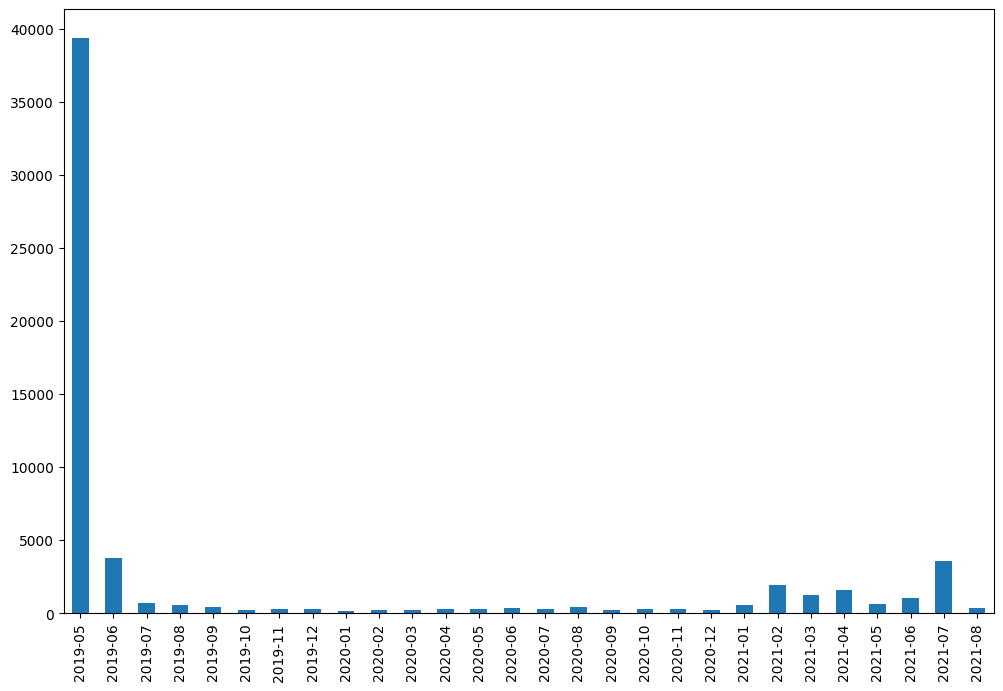

<IPython.core.display.Javascript object>

In [13]:
data_positive = data.transpose()[
    [
        "bitte",
        "gut",
        "danke",
        "warum",
        "anständig",
        "liebe",
        "glück",
        "schön",
        "fantastische",
        "dankbar",
        "frei",
    ]
]
df_parties = data_positive.abs().sum(axis=1)

ax = df_parties.plot.bar()

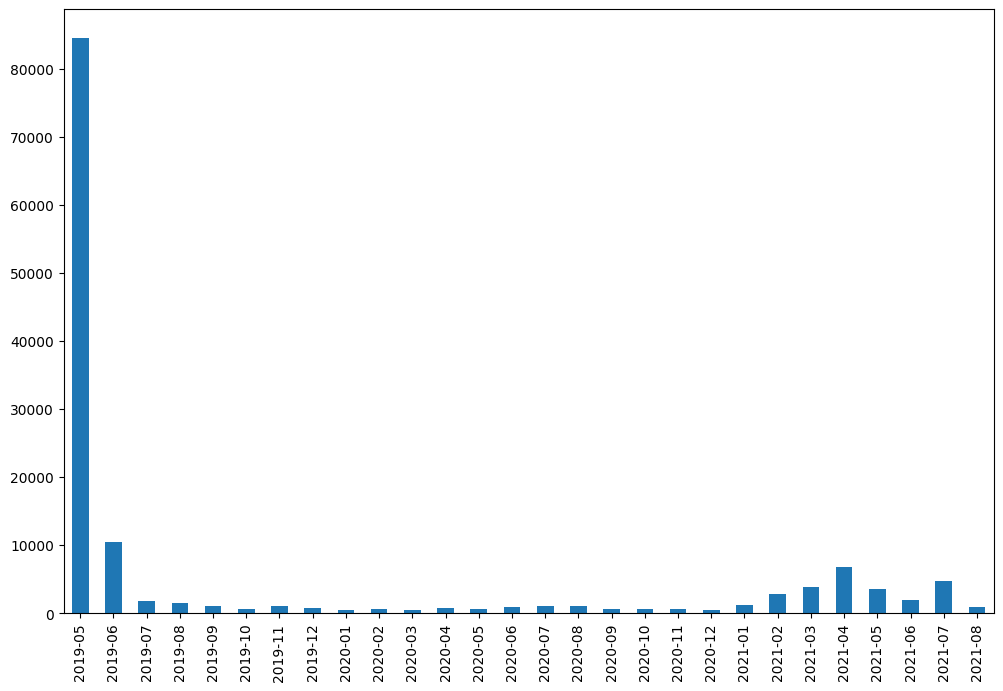

<IPython.core.display.Javascript object>

In [14]:
data_climate = data.transpose()[
    [
        "welt",
        "erde",
        "menschen",
        "deutschland",
        "wirklich",
        "klimawandel",
        "klima",
        "leben",
        "jahre",
        "jahren",
        "corona",
        "existenz",
        "heutzutage",
        "klimaskeptikern",
        "globalisierung",
        "solarparks",
        "naturgesetze",
        "generation",
        "atmosphäre",
        "wissenschaft",
        "wissenschaftlich",
        "wissenschaftliche",
        "strom",
        "energie",
        "energien",
        "kohle",
        "temperatur",
        "eu",
        "zukunft",
        "jugend",
        "china",
        "friday",
        "futur",
        "demo",
        "umweltschutz",
        "wärmer",
    ]
]
df_parties = data_climate.abs().sum(axis=1)

ax = df_parties.plot.bar()